In [1]:
using Distributions
using Plots
using Posets

# Funciones

In [15]:
function metametodo(metodo, puntuaciones, puntuaciononly::Bool)
    ranks = [sortperm(puntuaciones[:,x], rev = true) for x in 1:size(puntuaciones)[2]];
    if puntuaciononly
        poset = metodo(puntuaciones)
    else # con rankings
        poset = metodo(ranks)
    end
    [energia_local(r, poset) for r in ranks]
end
function metametodo_poset(metodo, poseto, puntuaciones, puntuaciononly::Bool)
    ranks = [sortperm(puntuaciones[:,x], rev = true) for x in 1:size(puntuaciones)[2]];
    if puntuaciononly
        poset = metodo(puntuaciones)
    else # con rankings
        poset = metodo(ranks)
    end
    norm(poseto - poset)
end
function compara_rankingsypdp(pdp, puntuaciones)
    ranks = [sortperm(puntuaciones[:,x], rev = true) for x in 1:size(puntuaciones)[2]];
    [energia_local(r, pdp) for r in ranks]
end

compara_rankingsypdp (generic function with 1 method)

In [16]:
corte0p70 = x -> αcut_poset(x |>fuzzy, 0.70)
corte0p80 = x -> αcut_poset(x |>fuzzy, 0.80)
corte0p90 = x -> αcut_poset(x |>fuzzy, 0.90)
corte0p95 = x -> αcut_poset(x |>fuzzy, 0.95)
corte0p98 = x -> αcut_poset(x |>fuzzy, 0.98)
metodom2 = x -> x |> m2 |> pareja_matrizadyacencia
metodom3 = x -> x |> m3 |> pareja_matrizadyacencia

#49 (generic function with 1 method)

In [17]:
mat = [1. .3; .3 1.]
matsesgada = [2.6 2.4; 2.4 2.6]
nmat = [0.01 0.; 0. 0.01]

2×2 Array{Float64,2}:
 0.01  0.0
 0.0   0.01

# Datos

## Energia local con metodos

In [18]:
ejemplo = [generapuntuaciones_gaussian(10,7,2;varerror=.99)[2] for _ in 1:10^3];

In [19]:
anima_corte0p98_nruido = [metametodo(corte0p98, ej, true) for ej in ejemplo];
anima_corte0p95_nruido = [metametodo(corte0p95, ej, true) for ej in ejemplo];
anima_corte0p90_nruido = [metametodo(corte0p90, ej, true) for ej in ejemplo];
anima_corte0p80_nruido = [metametodo(corte0p80, ej, true) for ej in ejemplo];

In [20]:
ejemplo_nonoise = [generapuntuaciones_gaussian(10,7,2)[2] for _ in 1:10^3];

In [21]:
anima_corte0p98 = [metametodo(corte0p98, ej, true) for ej in ejemplo_nonoise];
anima_corte0p95 = [metametodo(corte0p95, ej, true) for ej in ejemplo_nonoise];
anima_corte0p90 = [metametodo(corte0p90, ej, true) for ej in ejemplo_nonoise];
anima_corte0p80 = [metametodo(corte0p80, ej, true) for ej in ejemplo_nonoise];

## Energia local pdp vs sus rankings + ruido

In [22]:
ejemplo_nonoise_pdp = [generapuntuaciones_gaussian(10,7,2) for _ in 1:10^3];

In [23]:
comparativa_rankspdp = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in ejemplo_nonoise_pdp];

In [24]:
ejemplo_noise_pdp = [generapuntuaciones_gaussian(10,7,2;varerror = .99) for _ in 1:10^3];

In [25]:
lista_grande = [[generapuntuaciones_gaussian(10,7,2;varerror = ss) for _ in 1:10^3] for ss in [0.5 1.0 1.5 2.0 2.5 2.99]./3];

In [26]:
comparativa_rankspdp_connruido = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in ejemplo_noise_pdp];

In [27]:
comparativa_rankspdp_connruido0p5 = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in lista_grande[1]];

comparativa_rankspdp_connruido1p0 = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in lista_grande[2]];

comparativa_rankspdp_connruido1p5 = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in lista_grande[3]];

comparativa_rankspdp_connruido2p0 = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in lista_grande[4]];

comparativa_rankspdp_connruido2p5 = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in lista_grande[5]];

In [28]:
comparativa_rankspdp_connruido3p0 = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in lista_grande[6]];

In [29]:
comparativa_rankspdp_connruido = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in ejemplo_noise_pdp];

## Comparar posets

In [30]:
datos_comprarpdpconmetodo_ruido0p5_alfa0p7 = [metametodo_poset(corte0p70, pdp, puntos, true) for (pdp, puntos) in lista_grande[1]];
datos_comprarpdpconmetodo_ruido0p5_alfa0p8 = [metametodo_poset(corte0p80, pdp, puntos, true) for (pdp, puntos) in lista_grande[1]];
datos_comprarpdpconmetodo_ruido0p5_alfa0p9 = [metametodo_poset(corte0p90, pdp, puntos, true) for (pdp, puntos) in lista_grande[1]];
# comparativa_rankspdp_connruido1p0 = [metametodo_poset(pdp, puntos) for (pdp, puntos) in lista_grande[2]];

# comparativa_rankspdp_connruido1p5 = [metametodo_poset(pdp, puntos) for (pdp, puntos) in lista_grande[3]];

# comparativa_rankspdp_connruido2p0 = [metametodo_poset(pdp, puntos) for (pdp, puntos) in lista_grande[4]];

# comparativa_rankspdp_connruido2p5 = [metametodo_poset(pdp, puntos) for (pdp, puntos) in lista_grande[5]];


In [31]:
datos_comprarpdpconmetodo_ruido0p5_alfa0p7 = [metametodo_poset(corte0p70, pdp, puntos, true) for (pdp, puntos) in lista_grande[1]];
datos_comprarpdpconmetodo_ruido0p5_alfa0p8 = [metametodo_poset(corte0p80, pdp, puntos, true) for (pdp, puntos) in lista_grande[1]];
datos_comprarpdpconmetodo_ruido0p5_alfa0p9 = [metametodo_poset(corte0p90, pdp, puntos, true) for (pdp, puntos) in lista_grande[1]];
datos_comprarpdpconmetodo_ruido0p5_alfa0p95 = [metametodo_poset(corte0p95, pdp, puntos, true) for (pdp, puntos) in lista_grande[1]];
# comparativa_rankspdp_connruido1p0 = [metametodo_poset(pdp, puntos) for (pdp, puntos) in lista_grande[2]];

# comparativa_rankspdp_connruido1p5 = [metametodo_poset(pdp, puntos) for (pdp, puntos) in lista_grande[3]];

# comparativa_rankspdp_connruido2p0 = [metametodo_poset(pdp, puntos) for (pdp, puntos) in lista_grande[4]];

# comparativa_rankspdp_connruido2p5 = [metametodo_poset(pdp, puntos) for (pdp, puntos) in lista_grande[5]];


# dif

In [ ]:
[caminatale(corte0p95(lista_grande[1][1][2]), 10^2) for _ in 1:10^3] |> unique!

In [ ]:
[caminatale(lista_grande[1][1][1] |> transpose |> Array, 10^2) for _ in 1:10^3] |> unique!

# dif

In [32]:
datos_comprarpdpconmetodo_ruido1p0_alfa0p7 = [metametodo_poset(corte0p70, pdp, puntos, true) for (pdp, puntos) in lista_grande[2]];
datos_comprarpdpconmetodo_ruido1p0_alfa0p8 = [metametodo_poset(corte0p80, pdp, puntos, true) for (pdp, puntos) in lista_grande[2]];
datos_comprarpdpconmetodo_ruido1p0_alfa0p9 = [metametodo_poset(corte0p90, pdp, puntos, true) for (pdp, puntos) in lista_grande[2]];
datos_comprarpdpconmetodo_ruido1p0_alfa0p95 = [metametodo_poset(corte0p95, pdp, puntos, true) for (pdp, puntos) in lista_grande[2]];

In [33]:
datos_comprarpdpconmetodo_ruido1p5_alfa0p7  = [metametodo_poset(corte0p70, pdp, puntos, true) for (pdp, puntos) in lista_grande[3]];
datos_comprarpdpconmetodo_ruido1p5_alfa0p8  = [metametodo_poset(corte0p80, pdp, puntos, true) for (pdp, puntos) in lista_grande[3]];
datos_comprarpdpconmetodo_ruido1p5_alfa0p9  = [metametodo_poset(corte0p90, pdp, puntos, true) for (pdp, puntos) in lista_grande[3]];
datos_comprarpdpconmetodo_ruido1p5_alfa0p95 = [metametodo_poset(corte0p95, pdp, puntos, true) for (pdp, puntos) in lista_grande[3]];

In [34]:
datos_comprarpdpconmetodo_ruido1p5_m2  = [metametodo_poset(metodom2, pdp, puntos, true) for (pdp, puntos) in lista_grande[3]];
datos_comprarpdpconmetodo_ruido1p5_m3  = [metametodo_poset(metodom3, pdp, puntos, true) for (pdp, puntos) in lista_grande[3]];

In [35]:
datos_comprarpdpconmetodo_ruido1p5_m2  = [metametodo_poset(metodom2, pdp, puntos, true) for (pdp, puntos) in lista_grande[3]];

## Sesgo

Se va  acomparar el pdp con los rankings

In [36]:
datos_ruido_sinsesgo = [generapuntuaciones_gaussian(10,7,2;varerror = 0.99) for _ in 1:10^3];

In [37]:
datos_ruido_consesgo = [generapuntuaciones_gaussian(10,7,2;varerror = 0.99,matnodos=matsesgada) for _ in 1:10^3];

In [38]:
comparativa_rankspdp_sinsesgo = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in datos_ruido_sinsesgo];

In [39]:
comparativa_rankspdp_consesgo = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in datos_ruido_consesgo];

# Resultados

## Correlacion

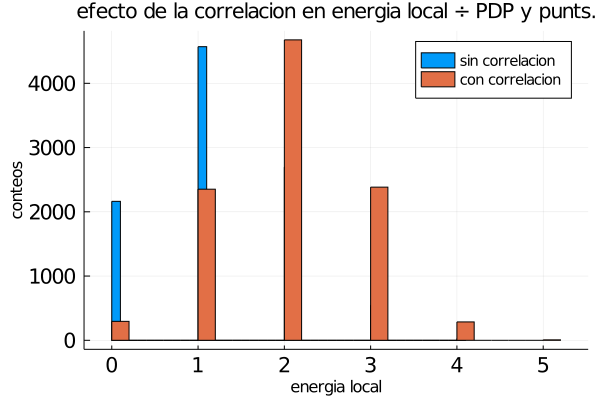

In [48]:
histogram([vcat(comparativa_rankspdp_sinsesgo...),vcat(comparativa_rankspdp_consesgo...)],
labels=["sin correlacion" "con correlacion"],
xlabel="energia local",ylabel="conteos",
xtickfontsize=14,
ytickfontsize=14,
legendfontsize=10,
title = "efecto de la correlacion en energia local ÷ PDP y punts.")

## Otros

In [45]:
vcat(comparativa_rankspdp...) |> countmap

Dict{Int64,Int64} with 1 entry:
  0 => 10000

In [46]:
vcat(comparativa_rankspdp_connruido...) |> countmap

Dict{Int64,Int64} with 6 entries:
  0 => 2230
  4 => 22
  2 => 2767
  3 => 504
  5 => 1
  1 => 4476

Abajo, se usa alguno de los metodos (m2,m3, corte alfa) sobre las puntuaciones (con ruido)
y se compara con los rankings (con ruido).

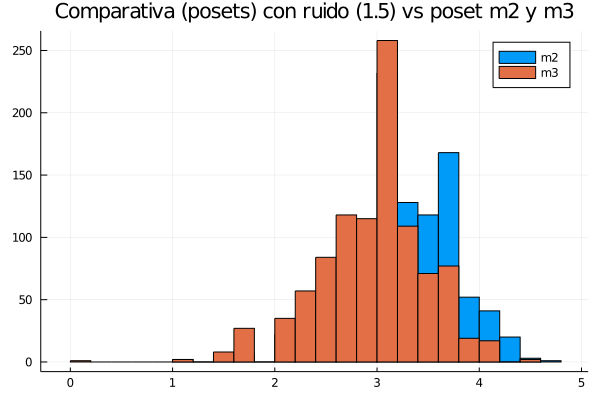

In [47]:
histogram([vcat(datos_comprarpdpconmetodo_ruido1p5_m2...),vcat(datos_comprarpdpconmetodo_ruido1p5_m3...)],
title = "Comparativa (posets) con ruido (1.5) vs poset m2 y m3",
 labels=["m2" "m3"])

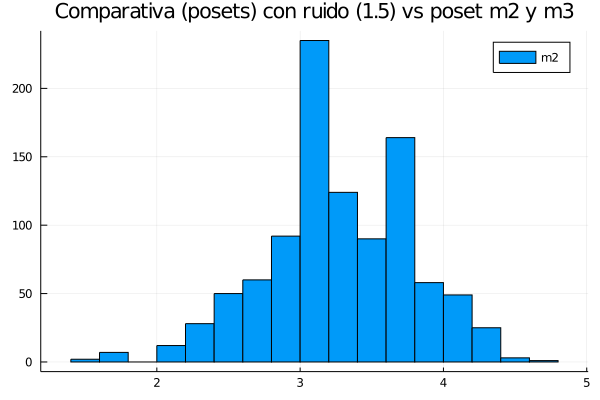

In [51]:
histogram(vcat(datos_comprarpdpconmetodo_ruido1p5_m2...),
 title = "Comparativa (posets) con ruido (1.5) vs poset m2 y m3",
 labels="m2")

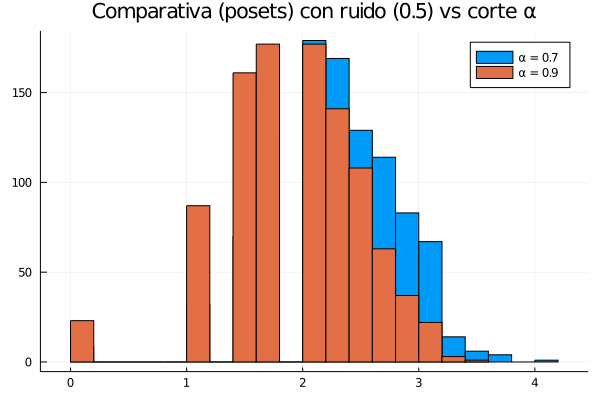

In [48]:
histogram([vcat(datos_comprarpdpconmetodo_ruido0p5_alfa0p9...),vcat(datos_comprarpdpconmetodo_ruido0p5_alfa0p95...)],
title = "Comparativa (posets) con ruido (0.5) vs corte α",
 labels=["α = 0.7" "α = 0.9" "α = 0.95"])

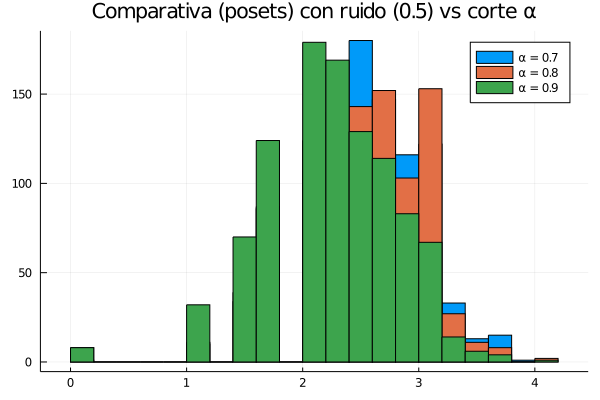

In [49]:
histogram([vcat(datos_comprarpdpconmetodo_ruido0p5_alfa0p7...),vcat(datos_comprarpdpconmetodo_ruido0p5_alfa0p8...),vcat(datos_comprarpdpconmetodo_ruido0p5_alfa0p9...)],
 title = "Comparativa (posets) con ruido (0.5) vs corte α",
 labels=["α = 0.7" "α = 0.8" "α = 0.9"])

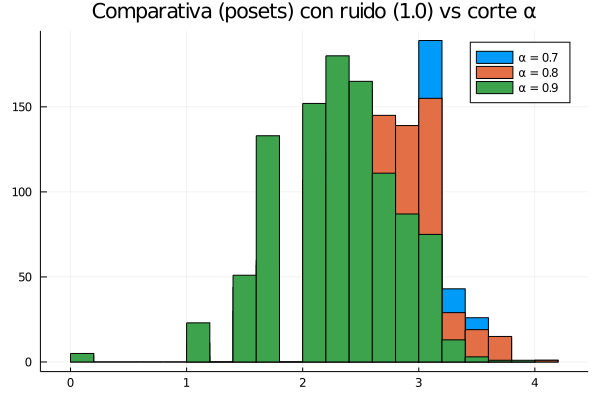

In [50]:
histogram([vcat(datos_comprarpdpconmetodo_ruido1p0_alfa0p7...),vcat(datos_comprarpdpconmetodo_ruido1p0_alfa0p8...),vcat(datos_comprarpdpconmetodo_ruido1p0_alfa0p9...)],
title = "Comparativa (posets) con ruido (1.0) vs corte α",
 labels=["α = 0.7" "α = 0.8" "α = 0.9"])

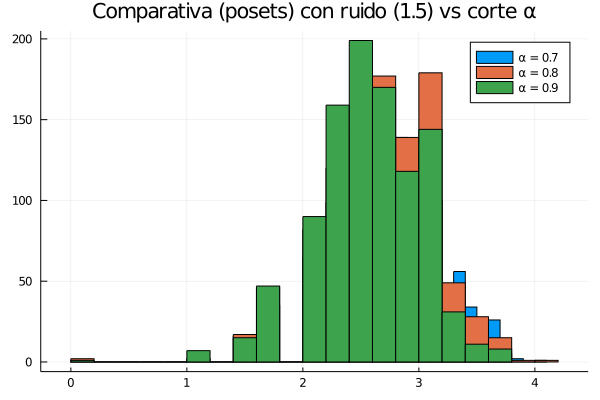

In [51]:
histogram([vcat(datos_comprarpdpconmetodo_ruido1p5_alfa0p7...),vcat(datos_comprarpdpconmetodo_ruido1p5_alfa0p8...),vcat(datos_comprarpdpconmetodo_ruido1p5_alfa0p9...)],
title = "Comparativa (posets) con ruido (1.5) vs corte α",
labels=["α = 0.7" "α = 0.8" "α = 0.9"])

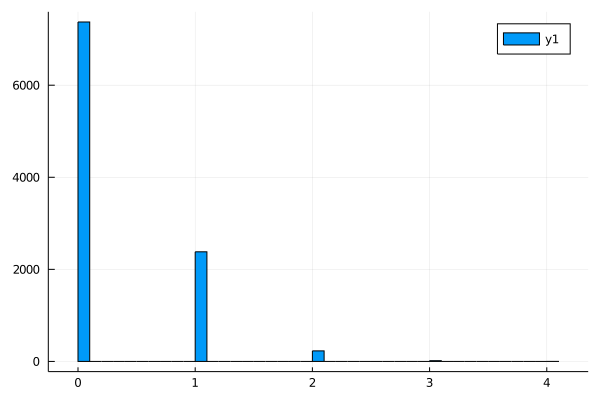

In [52]:
histogram(vcat(comparativa_rankspdp_connruido0p5...))

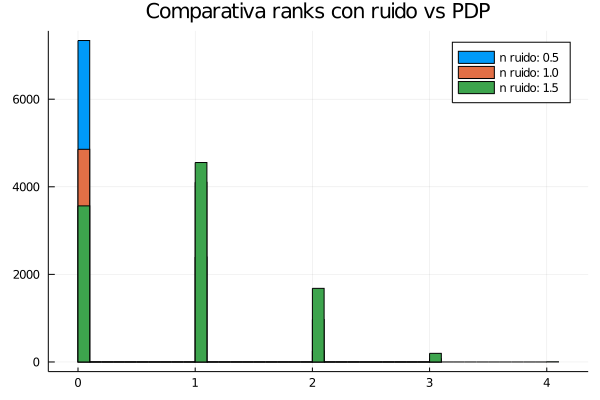

In [52]:
histogram([vcat(comparativa_rankspdp_connruido0p5...),vcat(comparativa_rankspdp_connruido1p0...),vcat(comparativa_rankspdp_connruido1p5...)],
labels=["n ruido: 0.5" "n ruido: 1.0" "n ruido: 1.5"],
title = "Comparativa ranks con ruido vs PDP")

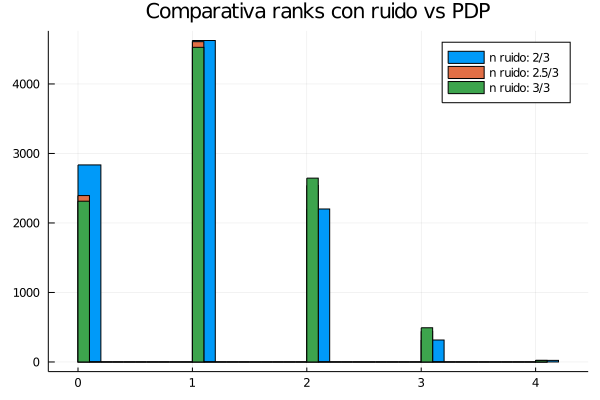

In [49]:
histogram([vcat(comparativa_rankspdp_connruido2p0...),vcat(comparativa_rankspdp_connruido2p5...),vcat(comparativa_rankspdp_connruido3p0...)],
labels=["n ruido: 2/3" "n ruido: 2.5/3" "n ruido: 3/3"],
title = "Comparativa ranks con ruido vs PDP")

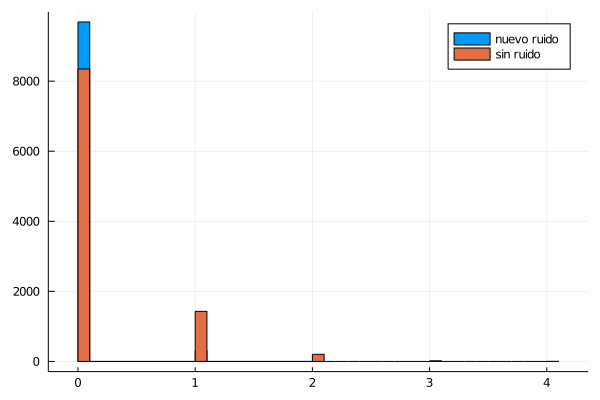

In [54]:
histogram([vcat(anima_corte0p98_nruido...), vcat(anima_corte0p98...)], labels = ["nuevo ruido" "sin ruido"])

## Posiciones promedio

In [2]:
function obtenerranks_depuntuacion(puntuaciones::Array{Float64,2})
    ranks = [sortperm(puntuaciones[:,x], rev = true) for x in 1:size(puntuaciones)[2]];
end

obtenerranks_depuntuacion (generic function with 1 method)

In [9]:
fakelistapunt = [generapuntuaciones_gaussian(10,7,2;varerror=.99)[2] for _ in 1:10^3];

In [10]:
puntx1=hcat([[posicionpromedio(obtenerranks_depuntuacion(pun), i) for i in 1:7] for pun in fakelistapunt]...)

7×1000 Array{Float64,2}:
 4.7  5.1  2.9  4.4  4.5  4.6  4.7  3.9  …  4.3  4.6  2.9  3.8  2.8  2.3  4.5
 4.8  2.7  5.6  3.8  2.6  2.7  4.2  3.4     6.0  4.2  3.4  5.2  4.1  3.3  1.8
 5.1  4.1  5.1  5.5  4.2  5.1  3.3  4.1     4.1  5.1  4.1  4.1  2.9  4.6  3.4
 2.9  2.4  4.7  4.3  4.2  4.1  2.5  4.1     3.2  4.2  5.0  4.7  4.1  5.4  4.0
 2.7  5.8  3.5  3.8  3.2  3.8  5.9  3.6     2.4  3.2  4.4  3.6  6.6  4.6  3.6
 2.4  3.0  2.6  3.2  6.1  3.6  4.3  3.2  …  5.1  3.6  6.1  2.9  3.4  3.1  6.0
 5.4  4.9  3.6  3.0  3.2  4.1  3.1  5.7     2.9  3.1  2.1  3.7  4.1  4.7  4.7

In [12]:
[mean(puntx1[i,:]) for i in 1:7]

7-element Array{Float64,1}:
 4.028800000000001
 3.9743000000000004
 3.9986
 3.9522999999999993
 4.0432
 3.9888000000000003
 4.013999999999999

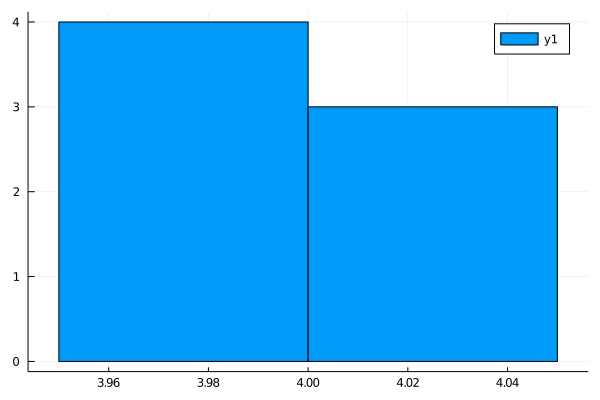

In [14]:
histogram([mean(puntx1[i,:]) for i in 1:7])